In [25]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Building the graph

https://www.tensorflow.org/get_started/basic_usage.html

In [26]:
import tensorflow as tf

# Create a Constant op that produces a 1x2 matrix.  The op is
# added as a node to the default graph.
#
# The value returned by the constructor represents the output
# of the Constant op.
matrix1 = tf.constant([[3., 3.]])

# Create another Constant that produces a 2x1 matrix.
matrix2 = tf.constant([[2.],[2.]])

# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
# The returned value, 'product', represents the result of the matrix
# multiplication.
product = tf.matmul(matrix1, matrix2)


In [27]:
product

## Launching the graph in a session

In [28]:
# Launch the default graph.
sess = tf.Session()

# To run the matmul op we call the session 'run()' method, passing 'product'
# which represents the output of the matmul op.  This indicates to the call
# that we want to get the output of the matmul op back.
#
# All inputs needed by the op are run automatically by the session.  They
# typically are run in parallel.
#
# The call 'run(product)' thus causes the execution of three ops in the
# graph: the two constants and matmul.
#
# The output of the op is returned in 'result' as a numpy `ndarray` object.
result = sess.run(product)
print result
# ==> [[ 12.]]

# Close the Session when we're done.
sess.close()


[[ 12.]]


In [4]:
# You can also enter a Session with a "with" block.
# The Session closes automatically at the end of the with block.
with tf.Session() as sess:
  result = sess.run([product])
  print result


[array([[ 12.]], dtype=float32)]


# Interactive Usage

In [5]:
# Enter an interactive TensorFlow Session.
import tensorflow as tf
sess = tf.InteractiveSession()

x = tf.Variable([1.0, 2.0])
a = tf.constant([3.0, 3.0])

# Initialize 'x' using the run() method of its initializer op.
x.initializer.run()

# Add an op to subtract 'a' from 'x'.  Run it and print the result
sub = tf.sub(x, a)
print sub.eval()
# ==> [-2. -1.]


[-2. -1.]


## Tensors

### Variables

In [23]:
# Create a Variable, that will be initialized to the scalar value 0.
state = tf.Variable(0, name="counter")

# Create an Op to add one to `state`.

one = tf.constant(1)
new_value = tf.add(state, one)
update = tf.assign(state, new_value)

# Variables must be initialized by running an `init` Op after having
# launched the graph.  We first have to add the `init` Op to the graph.
init_op = tf.initialize_all_variables()

# Launch the graph and run the ops.
with tf.Session() as sess:
  # Run the 'init' op
  sess.run(init_op)
  # Print the initial value of 'state'
  print sess.run(state)
  # Run the op that updates 'state' and print 'state'.
  for _ in range(3):
    sess.run(update)
    print sess.run(state)
    

0
1
2
3


In [10]:
# multiple ops

input1 = tf.constant(3.0)
input2 = tf.constant(2.0)
input3 = tf.constant(5.0)
intermed = tf.add(input2, input3)
mul = tf.mul(input1, intermed)

with tf.Session() as sess:
  result = sess.run([mul, intermed])
  print result


[21.0, 7.0]


## Creation

In [11]:
# Create two variables.
weights = tf.Variable(tf.random_normal([784, 200], stddev=0.35),
                      name="weights")
biases = tf.Variable(tf.zeros([200]), name="biases")

## Initialization

In [15]:
# Add an op to initialize the variables.
init_op = tf.initialize_all_variables()

# Later, when launching the model
with tf.Session() as sess:
    # Run the init operation.
    sess.run(init_op)    
    print sess.run(biases)
    im = sess.run(weights)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


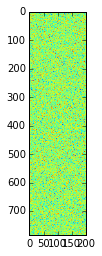

In [17]:
imshow(im)